<a href="https://colab.research.google.com/github/prog815/portfOptim/blob/master/%D0%9E%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B8%D1%80%D1%83%D0%B5%D0%BC_%D0%BF%D1%80%D0%BE%D0%B3%D0%BE%D0%BD_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BB%D0%B0%D0%B3%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек

In [ ]:
! pip install bt
! pip install git+https://github.com/prog815/progGA

     |████████████████████████████████| 2.7MB 8.3MB/s 
  Created wheel for bt: filename=bt-0.2.7-cp36-cp36m-linux_x86_64.whl size=533267 sha256=351bb458832a95c9a415d69768fee98f8f35db78bfd309f883a45e83164cffa2
  Stored in directory: /root/.cache/pip/wheels/ae/8a/a2/a679757e4e7219e6f17727d1422d4ce32da847678c6559da35
  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22813 sha256=1fd2dda6d3e2398fda0263ca64a80c2d60cac3e295809ab8f9e70098c0c0b646
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built bt ffn
  Cloning https://github.com/prog815/progGA to /tmp/pip-req-build-j7r7lw57
  Running command git clone -q https://github.com/prog815/progGA /tmp/pip-req-build-j7r7lw57
  Created wheel for progGA: filename=progGA-0.0.7-cp36-none-any.whl size=3733 sha256=071dbfcd711a282abb3c72c4b107501274b52971f0be22777451f275d6de389c
  Stored in directory: /tmp/pip-ephem-wheel-cache-jisr92r2/wheels/9c/7a/cc/d1ffa9ccaa42b

In [ ]:
import bt
from progGA import ListGenetic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os


fn = '/content/drive/My Drive/prog/model_opsl_07.11.2020.pkl'

/usr/local/lib/python3.6/dist-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [ ]:
! pip install git+https://github.com/prog815/portfOptim

  Cloning https://github.com/prog815/portfOptim to /tmp/pip-req-build-s0za9g0r
  Running command git clone -q https://github.com/prog815/portfOptim /tmp/pip-req-build-s0za9g0r
  Created wheel for portfOptim: filename=portfOptim-0.0.4-cp36-none-any.whl size=3097 sha256=014dc09bdc56a196a4030788a87012667a0e542a0334f01bbdb52b9fde9510d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-2xwp9lxd/wheels/ef/8b/25/89eadb83696c6f13f7c19550677e232c32182db7884471ca86
Successfully built portfOptim


In [ ]:
import portfOptim

# Загрузка истории

In [ ]:
#data = bt.get('AAPL,AAL,GE,F',start='2010-01-01')
data = bt.get(['AAPL','GE','BAC','AMD','PLUG','F'],start='2010-01-01')
lenData = len(data)
data

,aapl,ge,bac,amd,plug,f
Date,,,,,,
2010-01-04,6.593426,10.840267,13.816905,9.700000,7.000000,6.937616
2010-01-05,6.604825,10.896401,14.266021,9.710000,7.000000,7.396526
2010-01-06,6.499768,10.840267,14.433337,9.570000,6.700000,7.673220
2010-01-07,6.487752,11.401575,14.908874,9.470000,6.700000,7.868933
2010-01-08,6.530883,11.647147,14.776777,9.430000,6.800000,7.889179
...,...,...,...,...,...,...
2020-11-02,108.582664,7.520000,24.080000,74.699997,15.470000,7.710000
2020-11-03,110.249794,7.850000,24.690001,76.580002,16.950001,7.880000
2020-11-04,114.752022,7.850000,23.680000,81.349998,16.610001,7.640000


In [ ]:
dData = data.to_returns()
dData

,aapl,ge,bac,amd,plug,f
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.005178,0.032505,0.001031,0.000000,0.066148
2010-01-06,-0.015906,-0.005152,0.011728,-0.014418,-0.042857,0.037409
2010-01-07,-0.001849,0.051780,0.032947,-0.010449,0.000000,0.025506
2010-01-08,0.006648,0.021538,-0.008860,-0.004224,0.014925,0.002573
...,...,...,...,...,...,...
2020-11-02,-0.000827,0.013477,0.016034,-0.007836,0.105000,-0.002587
2020-11-03,0.015354,0.043883,0.025332,0.025167,0.095669,0.022049
2020-11-04,0.040837,0.000000,-0.040907,0.062288,-0.020059,-0.030457


# Поиск гиперпараметров

## Целевая функция

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

def getQualityMethod(lookback=100,lag=10):

    randPoint = np.random.randint(2*lag+lookback+1,lenData-1-3*lag)

    s = bt.Strategy('лучший', [bt.algos.RunEveryNPeriods(1,offset=lookback+1),
                            bt.algos.SelectAll(),
                            bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=lookback)),
                            bt.algos.Rebalance()])
    test = bt.Backtest(s, data[(randPoint-lookback-1):(randPoint+lag)],progress_bar=False)

    s_eq = bt.Strategy('равновесный', [bt.algos.RunEveryNPeriods(1,offset=lookback+1),
                                    bt.algos.SelectAll(),
                                    bt.algos.WeighEqually(),
                                    bt.algos.Rebalance()])
    test_eq = bt.Backtest(s_eq, data[(randPoint-lookback-1):(randPoint+lag)],progress_bar=False)

    res = bt.run(test,test_eq)
    res = bt.ffn.calc_sharpe(res.prices.to_returns()[-lag:]).values
    
    # возвращаем разницу коэффициентов
    return res[0] - res[1]
    

getQualityMethod()

-0.17244798362795766

## Создание модели

In [ ]:
modelGA = ListGenetic(pop_size=200,
                      lookback=range(30,400),
                      quality_method=getQualityMethod)

if os.path.exists(fn):
    with open(fn,'rb') as fp:
        modelGA = pickle.load(fp)

## Бесконечный цикл поиска

In [ ]:
while True:
    modelGA.fit(100,echo_time=60)
    with open(fn,'wb') as fp:
        pickle.dump(modelGA,fp)

finish -  4661 {'quality': 0.042542259592554754, 'lookback': 399}
finish -  4761 {'quality': -0.44715015086411114, 'lookback': 261}
finish -  4861 {'quality': 0.06662466759335262, 'lookback': 260}
finish -  4961 {'quality': -0.024679434180464664, 'lookback': 276}
finish -  5061 {'quality': -0.07042256606159131, 'lookback': 396}
finish -  5161 {'quality': 0.3953670112594833, 'lookback': 264}
finish -  5261 {'quality': 0.10550751285757329, 'lookback': 266}
finish -  5361 {'quality': -0.3539052310190868, 'lookback': 280}
finish -  5461 {'quality': -0.07366285281440524, 'lookback': 269}
finish -  5561 {'quality': 0.15651608604707498, 'lookback': 245}
finish -  5661 {'quality': -0.003730022636614705, 'lookback': 226}
finish -  5761 {'quality': 0.47941881187842217, 'lookback': 264}
finish -  5861 {'quality': 0.39004753407350384, 'lookback': 261}
finish -  5961 {'quality': -0.02659530393396564, 'lookback': 296}
finish -  6061 {'quality': 0.02469195926829776, 'lookback': 277}
finish -  6161 {'

KeyboardInterrupt: ignored

## Графики

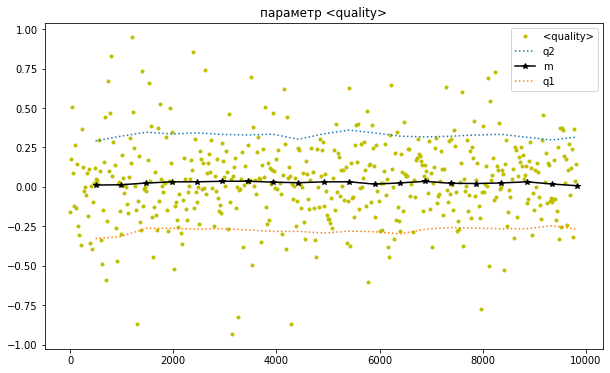

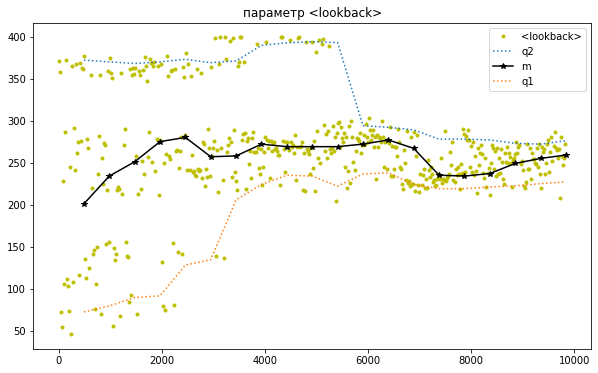

In [ ]:
modelGA.plot_hist_new(('quality','lookback'))


## Параметры лучшей

In [ ]:
best_par = modelGA.getBestParams()
best_par

{'lookback': 260}

# Прогон лучшей

In [ ]:
lookback_best = best_par['lookback']

s_best = bt.Strategy('лучший', [bt.algos.RunEveryNPeriods(1,offset=lookback_best+1),
                                bt.algos.SelectAll(),
                                bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=lookback_best)),
                                bt.algos.Rebalance()])
test_best = bt.Backtest(s_best, data)

s0 = bt.Strategy('равновесный', [bt.algos.RunEveryNPeriods(1,offset=lookback_best+1),
                                 bt.algos.SelectAll(),
                                 bt.algos.WeighEqually(),
                                 bt.algos.Rebalance()])
test0 = bt.Backtest(s0, data)

res_best = bt.run(test_best,test0)

лучший
0% [############################# ] 100% | ETA: 00:00:01равновесный
0% [############################# ] 100% | ETA: 00:00:00

## График баланса

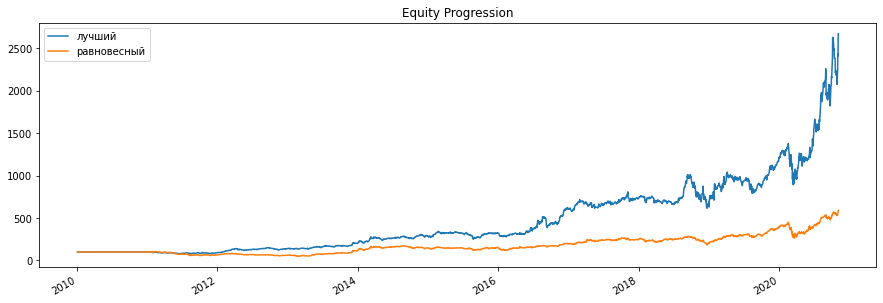

In [ ]:
res_best.plot()

## график распределения долей

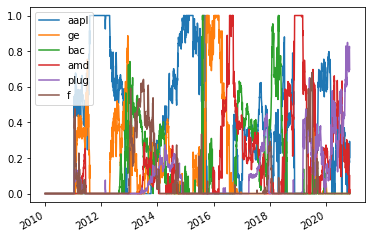

In [ ]:
res_best.get_security_weights().plot()

## итог

In [ ]:
res_best.display()

Stat                 лучший      равновесный
-------------------  ----------  -------------
Start                2010-01-03  2010-01-03
End                  2020-11-06  2020-11-06
Risk-free rate       0.00%       0.00%

Total Return         2570.88%    489.77%
Daily Sharpe         1.09        0.72
Daily Sortino        1.84        1.17
CAGR                 35.39%      17.78%
Max Drawdown         -39.22%     -54.02%
Calmar Ratio         0.90        0.33

MTD                  28.72%      11.50%
3m                   38.10%      19.36%
6m                   128.91%     84.76%
YTD                  127.32%     54.58%
1Y                   164.54%     72.54%
3Y (ann.)            48.92%      30.90%
5Y (ann.)            53.03%      31.08%
10Y (ann.)           38.91%      19.43%
Since Incep. (ann.)  35.39%      17.78%

Daily Sharpe         1.09        0.72
Daily Sortino        1.84        1.17
Daily Mean (ann.)    35.60%      20.43%
Daily Vol (ann.)     32.56%      28.49%
Daily Skew           0.36 

Енин А.В.

Оренбург